In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
from nltk import word_tokenize 
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [2]:
df = pd.read_csv('C:\\Users\\ejaza\\OneDrive\\Desktop\\amazon_alexa_data.csv')
df

,Unnamed: 0,rating,date,variation,verified_reviews,feedback
0,0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...,...
3145,3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [3]:
df.isnull().sum()

Unnamed: 0          0
rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [4]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [5]:
df.dtypes

Unnamed: 0           int64
rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3150 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3150 non-null   int64 
 1   rating            3150 non-null   int64 
 2   date              3150 non-null   object
 3   variation         3150 non-null   object
 4   verified_reviews  3150 non-null   object
 5   feedback          3150 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 172.3+ KB


In [7]:
df.describe()

,Unnamed: 0,rating,feedback
count,3150.000,3150.000000,3150.000000
mean,1574.500,4.463175,0.918413
std,909.471,1.068506,0.273778
min,0.000,1.000000,0.000000
25%,787.250,4.000000,1.000000
50%,1574.500,5.000000,1.000000
75%,2361.750,5.000000,1.000000
max,3149.000,5.000000,1.000000


In [8]:
df.shape

(3150, 6)

In [9]:
df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

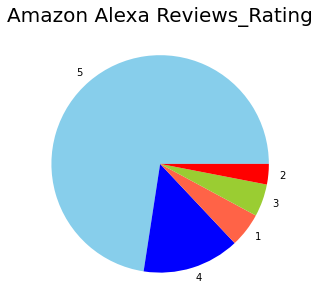

In [10]:
rating = df['rating'].value_counts()
numbers = rating.index
quantity = rating.values
customer_colors = ['skyblue', 'blue', 'tomato', 'yellowgreen', 'red']
plt.figure(figsize = (8,5))
plt.pie(quantity, labels = numbers, colors = customer_colors)
plt.title('Amazon Alexa Reviews_Rating', fontsize = 20)
plt.show()

In [11]:
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

<AxesSubplot:xlabel='count', ylabel='variation'>

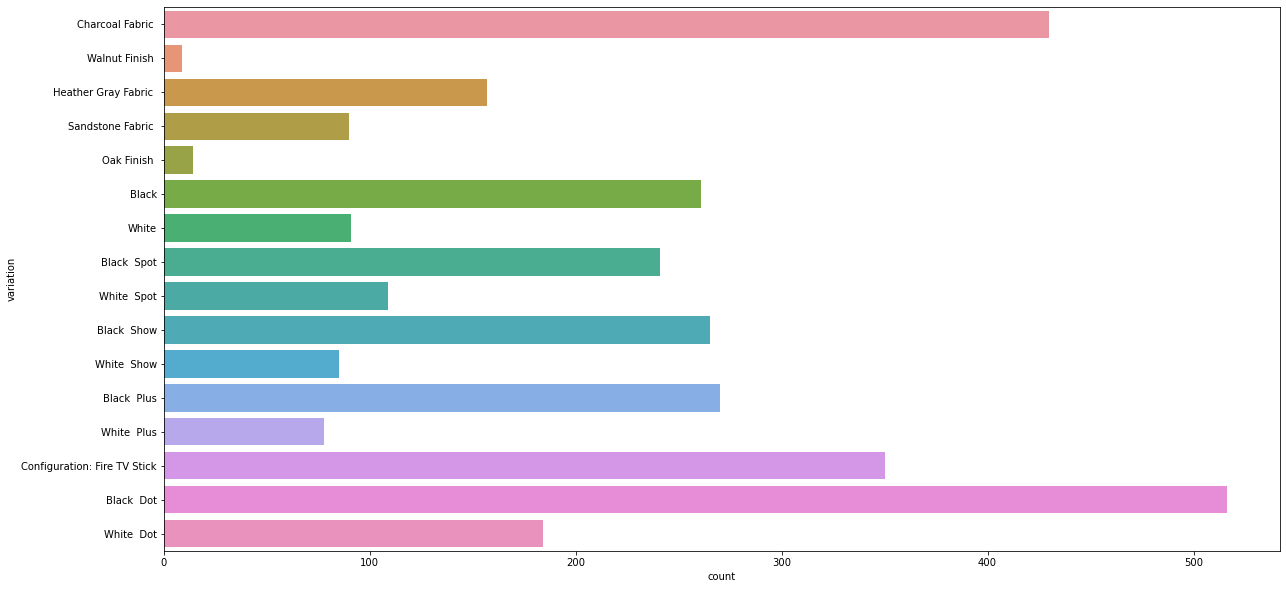

In [12]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y= 'variation', data=df)

In [13]:
df['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

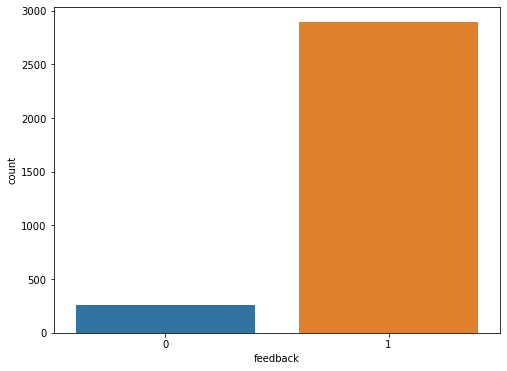

In [14]:
plt.figure(figsize = (8,6))
sns.countplot(x = df['feedback'])
plt.show()

# Text preprocessing steps

In [15]:
sw = stopwords.words('english')
lm = WordNetLemmatizer()

In [16]:
df['verified_reviews'][::]

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [17]:
reviews = []
for i in df['verified_reviews']:  
    t = re.sub('[^A-Za-z0-9]', ' ', i)      # removing punctuation
    t = t.lower()                           # conversion to lower case
    t = word_tokenize(t)                    # word tokenization
    t = [i for i in t if i not in sw]       # removing stop words
    t = [lm.lemmatize (i) for i in t]       # lemmatize
    t = " ".join(t)                         # joining the words to return sentences
    reviews.append(t)
print(reviews)

['love echo', 'loved', 'sometimes playing game answer question correctly alexa say got wrong answer like able turn light away home', 'lot fun thing 4 yr old learns dinosaur control light play game like category nice sound playing music well', 'music', 'received echo gift needed another bluetooth something play music easily accessible found smart speaker wait see else', 'without cellphone use many feature ipad see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep fun ask random question hear response seem smartbon politics yet', 'think 5th one purchased working getting one every room house really like feature offer specifily playing music echo controlling light throughout house', 'look great', 'love listened song heard since childhood get news weather information great', 'sent 85 year old dad talk constantly', 'love learning knew thing eveyday still figuring everything work far easy use understand make laugh time', 'purchased mother knee problem give some

In [18]:
x = reviews
y = df['feedback']
print(type(x))
print(type(y))
print(len(x))
print(y.shape)

<class 'list'>
<class 'pandas.core.series.Series'>
3150
(3150,)


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
cv = CountVectorizer(max_features = 1500) 
x_cv = cv.fit_transform(reviews).toarray()  # for each sentence the vectorize format contain onlu 1500 interger
print(x_cv)
print(x_cv.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(3150, 1500)


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_cv, y, test_size = 0.25, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(type(x))
print(type(y))

(2362, 1500)
(788, 1500)
(2362,)
(788,)
<class 'list'>
<class 'pandas.core.series.Series'>


# Models

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# a) MultinomiaNB

In [24]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [25]:
# Accuracy
print('Training score', mnb.score(x_train, y_train))
print('Testing score', mnb.score(x_test, y_test))

Training score 0.9597798475867908
Testing score 0.9276649746192893


In [26]:
ypred_mnb = mnb.predict(x_test)
ypred_mnb

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,

In [27]:
cm = confusion_matrix(y_test, ypred_mnb)
print(cm)
print(classification_report(y_test, ypred_mnb))
# Accuracy score
mnb_acc = accuracy_score(y_test, ypred_mnb)
print(mnb_acc)

[[ 32  39]
 [ 18 699]]
              precision    recall  f1-score   support

           0       0.64      0.45      0.53        71
           1       0.95      0.97      0.96       717

    accuracy                           0.93       788
   macro avg       0.79      0.71      0.74       788
weighted avg       0.92      0.93      0.92       788

0.9276649746192893


# b) Logistic Regression

In [28]:
ln = LogisticRegression()
ln.fit(x_train, y_train)

LogisticRegression()

In [29]:
# Accuracy
print('Training score', ln.score(x_train, y_train))
print('Testing score', ln.score(x_test, y_test))

Training score 0.9758679085520745
Testing score 0.9263959390862944


In [30]:
ypred_ln = ln.predict(x_test)
ypred_ln

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [31]:
cm = confusion_matrix(y_test, ypred_ln)
print(cm)
print(classification_report(y_test, ypred_ln))
# Accuracy score
ln_acc = accuracy_score(y_test, ypred_ln)
print(ln_acc)

[[ 21  50]
 [  8 709]]
              precision    recall  f1-score   support

           0       0.72      0.30      0.42        71
           1       0.93      0.99      0.96       717

    accuracy                           0.93       788
   macro avg       0.83      0.64      0.69       788
weighted avg       0.92      0.93      0.91       788

0.9263959390862944


# c) KNN Classifier

In [32]:
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [33]:
# Accuracy
print('Training score', knn.score(x_train, y_train))
print('Testing score', knn.score(x_test, y_test))

Training score 0.9212531752751905
Testing score 0.9098984771573604


In [34]:
ypred_knn = knn.predict(x_test)
ypred_knn

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [35]:
cm = confusion_matrix(y_test, ypred_knn)
print(cm)
print(classification_report(y_test, ypred_knn))
# Accuracy score
knn_acc = accuracy_score(y_test, ypred_knn)
print(knn_acc)

[[  0  71]
 [  0 717]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.91      1.00      0.95       717

    accuracy                           0.91       788
   macro avg       0.45      0.50      0.48       788
weighted avg       0.83      0.91      0.87       788

0.9098984771573604


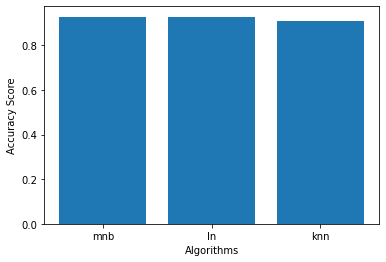

In [36]:
# Accuracies of all models bar graph
plt.bar(x = ['mnb', 'ln', 'knn'], height = [mnb_acc, ln_acc, knn_acc])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()

# Report

The results of our tests were quantified in terms of the Accuracy score of our prediction. Building up from the relatively good performance of MultinomialNB, it produced the best Accuracy score on test data. Hence, we can conclude that the MultinomialNB classifier works best on our dataset for prediction.